In [2]:
from problog.program import PrologString
from problog.tasks.dcproblog.solver import InferenceSolver
from problog.tasks.dcproblog.parser import DCParser
from problog.logic import Term

In [3]:
configuration = {
    "abe_name":"pyro",
    "n_samples":20000,
    "ttype":"float32",
    "device":"cpu",
}

In [4]:
str_program_1 = """
b~beta(1,1).
B::coin_flip(N):- B is b.

query_density(b).
"""

In [5]:
str_program_2 = """
b~beta(1,1).
B::coin_flip(N):- B is b.

evidence(coin_flip(1), true).
evidence(coin_flip(2), false).
evidence(coin_flip(3), true).

query_density(b).
"""

In [6]:
solver = InferenceSolver(**configuration)
program_1 = PrologString(str_program_1, parser=DCParser())
program_2 = PrologString(str_program_2, parser=DCParser())

In [7]:
probabilities_1 = solver.probability(program_1, **configuration)
probabilities_2 = solver.probability(program_2, **configuration)

In [8]:
b_term = Term("b")
mixture_b_prior = probabilities_1["dq"][b_term]
mixture_b_posterior = probabilities_2["dq"][b_term]

In [9]:
print(mixture_b_prior)
print(mixture_b_posterior)

Mixture(MixComp₀)
Mixture(MixComp₀)


In [10]:
b_prior, = mixture_b_prior.components()
b_posterior, = mixture_b_posterior.components()

In [11]:
print(b_posterior.samples)
print(b_posterior.weights.mean())

tensor([[0.6066, 0.4075, 0.1268,  ..., 0.8528, 0.3639, 0.9987]])
tensor(1.)


In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

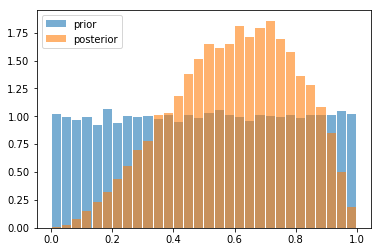

In [12]:
plt.hist(b_prior.samples, density=True, bins=30,rwidth=0.9, alpha = 0.6, label="prior")

plt.hist(b_posterior.samples, weights=b_posterior.weights, density=True, bins=30,rwidth=0.9, alpha=0.6, label="posterior")  # `density=False` would make counts
plt.legend(loc="upper left");